In [1]:
import cv2
import numpy as np
from src import utils
from src.estimator import VNectEstimator

import matplotlib.pyplot as plt

## whether apply transposed matrix (when camera is flipped)
T = False
# vnect input image size
box_size = 368
# parent joint indexes of each joint (for plotting the skeletal lines)
joint_parents = [16, 15, 1, 2, 3, 1, 5, 6, 14, 8, 9, 14, 11, 12, 14, 14, 1, 4, 7, 10, 13]

video = './pic/test_video.mp4'
camera_capture = cv2.VideoCapture(video)
estimator = VNectEstimator()

Initializing VNectEstimator...
VNectEstimator initialized.


CPU times: user 1.63 s, sys: 45.4 ms, total: 1.68 s
Wall time: 61.9 ms


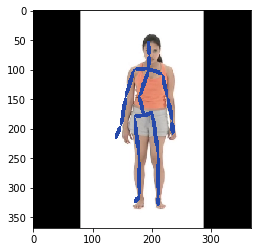

In [11]:
%%time
success, frame = camera_capture.read()
x, y, w, h = [0, 0, frame.shape[1], frame.shape[0]]
s = min (w, h)//2
# crop bounding box from the raw frame
frame = np.transpose(frame, axes=[1, 0, 2]).copy() if T else frame
frame_cropped = frame[h//2-s:h//2+s, w//2-s:w//2+s, :]
# vnect estimating process

joints_2d, joints_3d = estimator(frame_cropped)

# 2d plotting
frame_cropped = cv2.cvtColor(frame_cropped, cv2.COLOR_BGR2RGB)
frame_square = utils.img_scale_squarify(frame_cropped, box_size)
frame_square = utils.draw_limbs_2d(frame_square, joints_2d, joint_parents)
plt.imshow(frame_square)